<a href="https://colab.research.google.com/github/eduardodacostasoares/pytorch/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

# 0.Computer vision libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get rpetrained computer vision models that can be leveraged for other models
* `torchvision.transformers` - functions for manipulate your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterabe over a dataset.  

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1.Getting a dataset

The dataset will be Fashion-MNIST

* Fashionmnist dataset (URL): https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to download to?
    train=True,  # "Do you want the training dataset?" (a lot of PyTorch datasets have been formatted into training and testing sets)
    download=True, # to download the dataset
    transform=torchvision.transforms.ToTensor(), # convert images to tensor
    target_transform=None # transform labels/targets by the shape
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(), # same as "torchvision.transforms.ToTensor()"
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12019680.81it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205722.38it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3750391.54it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23701731.06it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Checking the shape

print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## 1.1 Visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

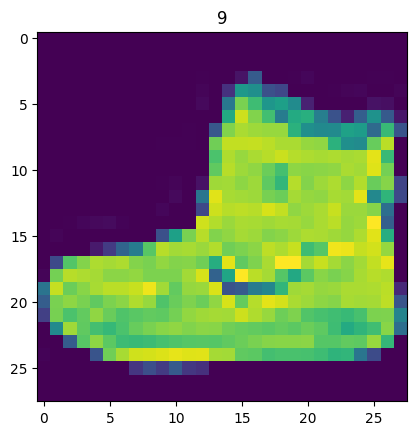

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]

print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

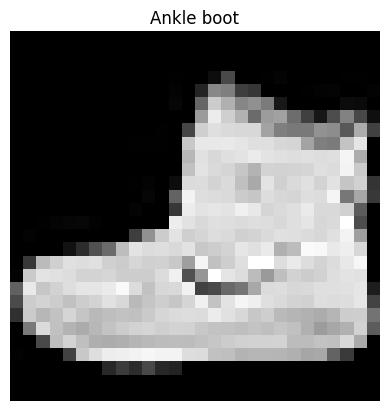

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

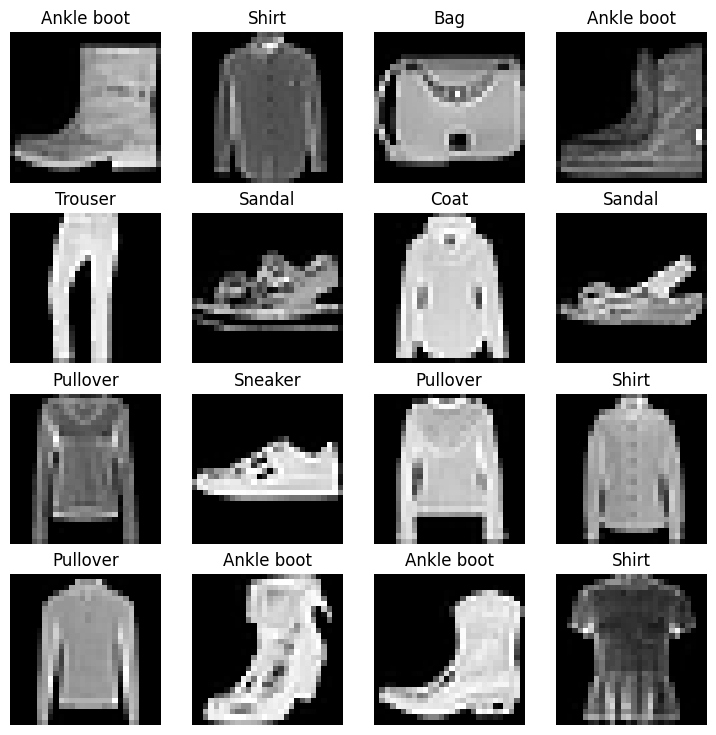

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))

rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

# 2.Prepare the DataLoeader

Right now, the data is in the form of PyTorch Datasets.

DataLoader turns our dataset in to a Python iterable.

More specifically, data needed to be turned into batches (or mini-batches)

1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So hte data is broken to 32 images at time (batch size of 32).

2. It gives the neural network more chances to update its gradients per epoch.

About mini-batches: https://www.youtube.com/watch?v=EANflep-cog&ab_channel=ArtificialIntelligence-AllinOne

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7de5e14062c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7de5e12c4130>)

In [ ]:
# Checking out

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7de5e14062c0>, <torch.utils.data.dataloader.DataLoader object at 0x7de5e12c4130>)
Lenght of train_dataloader: 1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32...


In [ ]:
# What's is inside the dataloader?
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


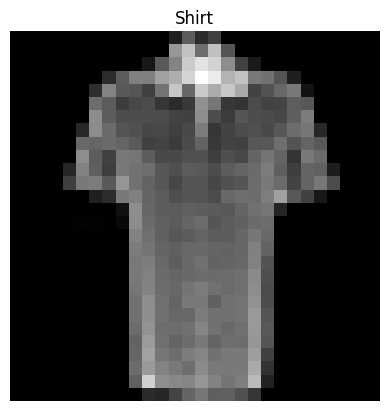

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# **3.**Model 0: build a baseline model

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: **start simply** and add **complexity when necessary**

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units:int,
               output_shape: int):
    super().__init__();
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # compress the image (in tesor format) in a vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units = 10, # how many units in hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setuo loss function, optimizer and evaluation metrics

* Loss function - since the model is a Multi-class data, the loss function will be `nn.CrossEntropyLoss()`

* Optimizer - will be `torch.optim.SGD()`(Stochastic Gradient Descent)

* Evaluation metric - Since it's a classification problem, **accuracy** will be used.

In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions already exists. Skipping Download...")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time the experiments

 Machine Learning is very experimental.

 Two of the main things you'll often want to track are:
 1. Model's performance (loss and accuracy values, etc...);
 2. How fast it runs (fast model).


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  ''' Prints difference between start and end time'''
  total_time = end - start
  print(f"\nTrain time on {device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
start_time = timer()
# -> Put the code here <-
end_time= timer()
print_train_time(start=start_time, end=end_time, device="cpu")


Train time on cpu: 0.000 seconds


4.941899999266752e-05

In [ ]:
# 3.3 Creating a training loop and training a model on batches of data...
# The optimizer will update a model's parameters **once per batch** rather than once per epoch

### 3.3 Creating a training loop´and training a model on batches of data.

1. Loop through the epochs.

2. Loop through training batches, perform training steps calculate the train loss *per batch*;

3. Loop through the testing batches, eprforming test steps, calculate the test loss *per batch*

4. Print results;

5. Time it all.

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs (it will be kept small for faster trining time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader): # X =  images / y = labels
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # Printing values
    if batch % 400 == 0:
      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  # Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc =0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3 Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1)) # test _pred outoputs is a logits so, the argmax is necessary to compare the prediction with the true result.

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc.: {test_acc:.4f}")

# Calculate ttraining time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test acc.: 82.0387
Epoch: 1
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test acc.: 83.1969
Epoch: 2
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test acc.: 83.4265

Train time on cpu: 28.744 seconds


#4.Make predictions and get Model 0 results

In [ ]:
y_pred.device

device(type='cpu')

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc +=accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created witha class
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# 5.Setup Device Agnostic-Code (for using a GPU, if there is one)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# 6.Model 1: Building a model with non-linearity

We learn about the power of non-linearity in

In [ ]:
# Create a model with linear and non-linear
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__();
    self.layer_stack = nn.Sequential(
        nn.Flatten(),             # Flatten inputs in a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
  )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update the model's parameterss tor educe the loss
                            lr=0.1)

### 6.1 Functionizing training and evaluation/testing loops

Creating:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):  #parameters: Model_1 (the model), loss_fn (loss function), accuracy_fn, optimizer and device (target device = 'CUDA')
  """ Performs a training with model trying to learn on data_loader."""

  train_loss, train_acc = 0, 0

  # Put model in trainin mode
  model.train()

  # Add loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):

    #Put data in a target device ("CUDA")
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred=model(X).to(device)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate loss

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # Divide total train loss and train acc by lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc.: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """ Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X).to(device)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true = y,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test accuracy
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc.: {test_acc:.2f}")

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

# Creating optimization and evaluation loop
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

Epoch: 0
-------
Train loss: 2.18399 | Train acc.: 61.34%
Test loss: 0.95636 | Test acc.: 65.00
Epoch: 1
-------
Train loss: 1.56201 | Train acc.: 71.93%
Test loss: 0.72227 | Test acc.: 73.91
Epoch: 2
-------
Train loss: 1.34054 | Train acc.: 75.94%
Test loss: 0.68500 | Test acc.: 75.02

Train time on cuda: 32.456 seconds


> **NOTE**: Sometimes, depending on your data/hardware you might find that your data model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from GPU outweights the compute benefits.
> 2. The hardware used has a better CPU in terms compute capability than the GPU.
>
> How to make your models compute faster: https://horace.io/brrr_intro.html

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

28.744051445000025

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc +=accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created witha class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
# et model_1 results dictionary

model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# 7.Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

Explaining about CNN: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Creating a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """

  def __init__(self,
  input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values set by the developer in Neural Networks are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # trick to calculate the real value to "in_channels"
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x


In [ ]:
torch.manual_seed(42)
model2 = FashionMNISTModelV2(input_shape=image.shape[0],
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`

Documentation for `nn.Conv2d`: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
# create some dummy date
torch.manual_seed(42)

#Batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image= images[0]
print(f"Image batch shape {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 64,
                       kernel_size = 3,  #  or test_image.shape[0]
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer

conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.4840, -0.0041,  0.5897,  ..., -0.4230,  0.8155,  0.3699],
         [ 0.3105,  0.9558, -0.6553,  ...,  0.8426,  0.2253, -0.3298],
         [ 1.2108, -1.4610,  0.3171,  ..., -0.3965,  1.1634, -0.1020],
         ...,
         [-0.2098,  0.4575, -0.4180,  ..., -0.2917, -0.5166, -0.0591],
         [ 0.2425, -0.2988,  1.4455,  ..., -0.6845, -0.7840, -0.6324],
         [-0.0942, -0.1337, -0.0944,  ...,  0.2286,  0.3672, -0.2358]],

        [[-0.1949,  0.0571, -0.3565,  ..., -0.7065,  1.6490, -1.1559],
         [ 0.3644, -0.0371, -0.5650,  ..., -0.1320,  0.2890, -0.7965],
         [-0.4513, -1.4598,  0.1140,  ..., -0.5041, -1.0022, -0.2958],
         ...,
         [ 0.4761, -0.3173, -0.7346,  ...,  0.2625, -0.3439, -0.4061],
         [-0.1093, -0.5496,  1.1154,  ..., -0.8510,  0.0306, -0.6942],
         [-0.5415, -0.1162, -0.2803,  ..., -1.2357,  0.3347, -0.6244]],

        [[ 0.2326,  0.3012,  0.2758,  ..., -1.0572,  0.0550,  0.9170],
         [ 0.6029,  0.1103, -0.2245,  ...,  1

In [ ]:
conv_output.shape

torch.Size([64, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()``

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out the original image shape without unsqueezed
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"\nShape after going through `conv_layer()`: {test_image_through_conv.shape}")

# Pass data though the max pool layer
test_image_through_conv_and_max = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])

Shape after going through `conv_layer()`: torch.Size([1, 64, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 64, 31, 31])


In [ ]:
# Understanding Max Pool layer function
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)


# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])


Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
random_tensor.shape

torch.Size([1, 1, 2, 2])

In [ ]:
dummy_tensor = torch.randn(size=(1,28,28)).to(device)
dummy_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model2(dummy_tensor.unsqueeze(0)) # mat1 = shape of x before enter the classifier / mat2 = hidden_units size (if 10, will be 10 x 10)

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 7.3 Setup loss function and optimizer for `model2`

In [ ]:
# setup loss function/eval metrics/ optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)

In [ ]:
model2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## 7.4 Training and testing `model2` using functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm
# Measure time

from timeit import default_timer as timer
train_time_start_model2 = timer()

# Train model

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------------")
  train_step(model = model2,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model2,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model2 = timer()
total_train_time_model2 = print_train_time(start=train_time_start_model2,
                                           end=train_time_end_model2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Train loss: 1.17477 | Train acc.: 78.80%
Test loss: 0.38600 | Test acc.: 86.50
Epoch: 1
--------------
Train loss: 0.72439 | Train acc.: 87.04%
Test loss: 0.35077 | Test acc.: 87.12
Epoch: 2
--------------
Train loss: 0.64638 | Train acc.: 88.34%
Test loss: 0.31908 | Test acc.: 88.22

Train time on cuda: 36.225 seconds


In [ ]:
# Get model2 results
model2_results = eval_model(
    model=model2,
    data_loader= test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3190772831439972,
 'model_acc': 88.21884984025559}

# 8.Comparing the results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.319077,88.218850


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.744051
1,FashionMNISTModelV1,0.685001,75.019968,32.455774
2,FashionMNISTModelV2,0.319077,88.218850,36.225237


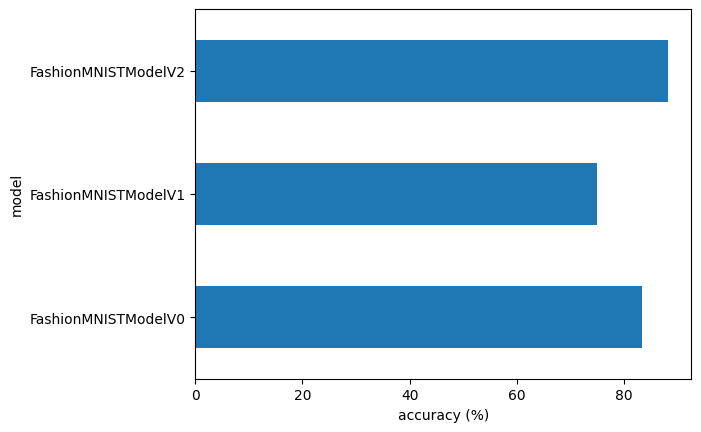

In [ ]:
# Visualize the model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# 9.Make evaluate random predictions with the best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #Get pred_prob off gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

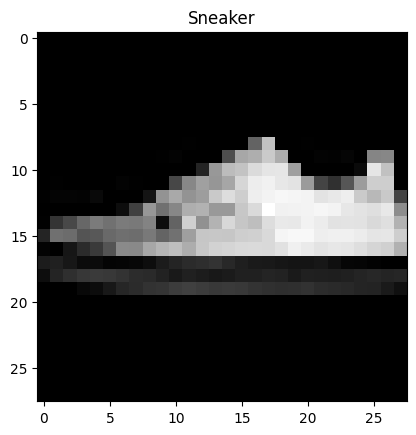

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model2,
                              data=test_samples)

# View first two predictions probabilities
pred_probs[:2]

tensor([[2.5828e-08, 1.0106e-07, 8.3361e-07, 2.5237e-07, 2.4427e-08, 2.5752e-05,
         3.5969e-09, 9.9995e-01, 9.1442e-06, 1.1536e-05],
        [6.8014e-01, 8.6213e-04, 1.7142e-03, 1.5724e-01, 1.4167e-03, 2.7702e-06,
         1.5809e-01, 3.2831e-05, 4.9873e-04, 2.4790e-06]])

In [ ]:
# Convert pred probs into pred labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 0, 3, 0, 4, 2, 0, 4, 4])

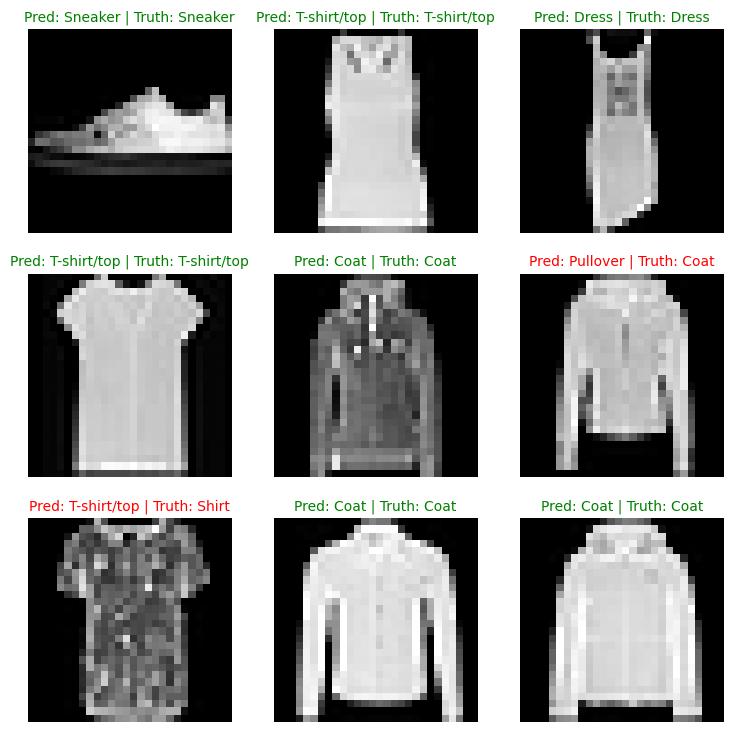

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction labels (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text.
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth (model is correct)
  else:
    plt.title(title_text, fontsize=10, c="r")  # red if predictions is not same as truth (model is wrong)

  plt.axis(False);

# 10.Making a confusion matrix for further prediction evaluation

* Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with model on the test dataset;
2. Make a consfuision matrix using `torchmetrics.ConfusionMatrix()` : https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html

3. Plot the consfusion matrix using `mlxtend.plotting.plot_confusion_matrix()` :   https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1 make predictions with trained model

y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= "Making predictions..."):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model2(X)
    # Turn predictions from logits -> prediction probabilities -> predition labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# see if required packages are installed
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
mlxtend version: 0.23.0


In [ ]:
len(y_pred_tensor), len(test_data.targets)

(10000, 10000)

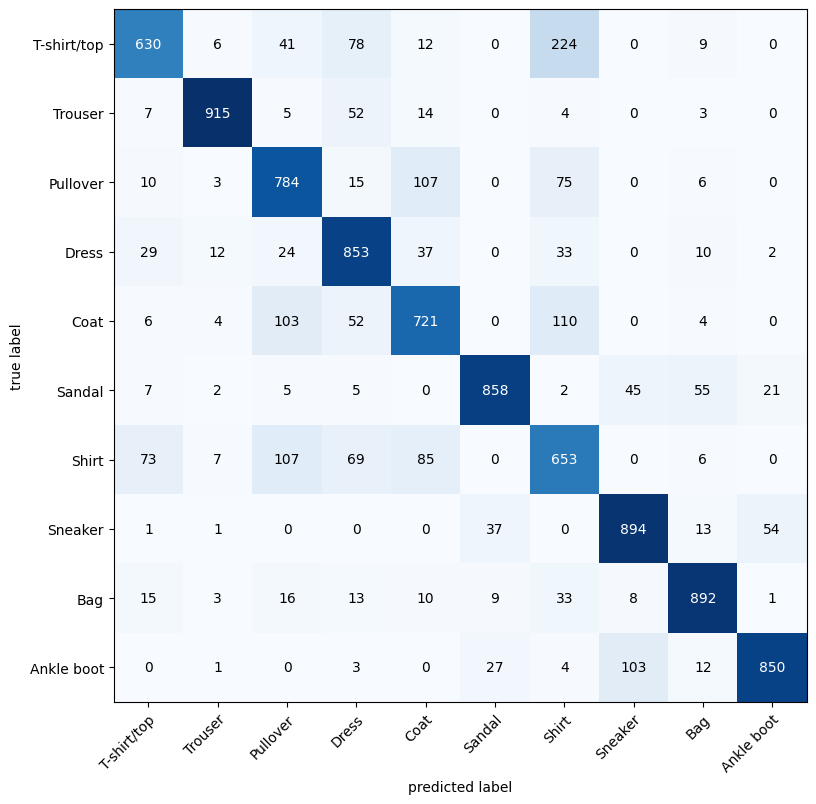

In [ ]:
from torchmetrics.classification import MulticlassConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare prediction targets
confmat = MulticlassConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib have problems to work with Torch Tensor
    class_names=class_names,
    figsize=(16,9)
)

In [ ]:
confmat_tensor

tensor([[630,   6,  41,  78,  12,   0, 224,   0,   9,   0],
        [  7, 915,   5,  52,  14,   0,   4,   0,   3,   0],
        [ 10,   3, 784,  15, 107,   0,  75,   0,   6,   0],
        [ 29,  12,  24, 853,  37,   0,  33,   0,  10,   2],
        [  6,   4, 103,  52, 721,   0, 110,   0,   4,   0],
        [  7,   2,   5,   5,   0, 858,   2,  45,  55,  21],
        [ 73,   7, 107,  69,  85,   0, 653,   0,   6,   0],
        [  1,   1,   0,   0,   0,  37,   0, 894,  13,  54],
        [ 15,   3,  16,  13,  10,   9,  33,   8, 892,   1],
        [  0,   1,   0,   3,   0,  27,   4, 103,  12, 850]])

# 11. Save and load best performing model

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model save
MODEL_NAME = "03_computer_vision_model2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_computer_vision_model2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

# Load in the save styate_dict()
loaded_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the loaded model 2
torch.manual_seed(42)

loaded_model2_results = eval_model(
    model=loaded_model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3190772831439972,
 'model_acc': 88.21884984025559}

In [ ]:
model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3190772831439972,
 'model_acc': 88.21884984025559}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model2_results["model_loss"]),
              torch.tensor(loaded_model2_results["model_loss"])
              #atol=1e-02 -> "atol" hyperparameter makes an tolerance in the difference between model_result and loaded_model_result
              )

tensor(True)

# **EXERCISES**

## 1 - What are 3 areas in industry where computer vision is currently being used?

In [ ]:
#    1) What are 3 areas in industry where computer vision is currently being used?

# ANSWER: Medicine (to help doctors in their medical examination activities),
# Autonomous vehycles (system to help to drive the car by itself (e.g. determines if the car will trun left or stop)
# Spacial Researches (for example, Image Restoration, on images taken by artificial satellites)

## 2 - 3. Search "what is overfitting in machine learning" and write down 3 of the things you find and a sentence about each.
     
**Note**: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# ANSWER: Overfitting occurs when the model has a high precision with the train dataset,
# but has a poor precision with the test data. Some reasos to this occurs are: a) Small train dataset (so, need to increase it size),
# b) noisy data (when a train dataset has much irrelevant data); or, c) train model for long time with one only dataset (can be resolved
# adding more data to train, not equals to original train dataset).

## 4 - Spend 20-minutes reading and clicking through the CNN Explainer website.
* Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

## 5 - 13. Creating a ConvNet2d

In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms

In [ ]:
# Get the MNIST dataset
train_data= datasets.MNIST(root=".",
                          train=True,
                          download=True,
                          transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 118384225.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 54006105.14it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30050409.51it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21238047.68it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6 - Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


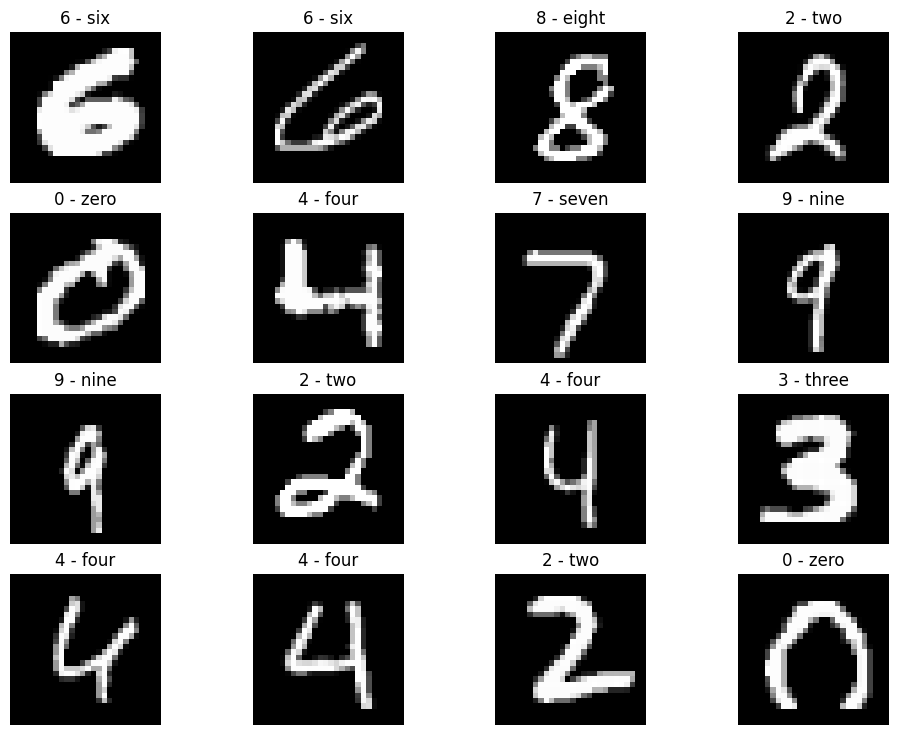

In [ ]:
import matplotlib.pyplot as plt
torch.manual_seed(42)
fig = plt.figure(figsize=(12,9))

rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  print(img.shape)
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 7 - Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e77f10ed420>,
 <torch.utils.data.dataloader.DataLoader at 0x7e77f10ef460>)

In [ ]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8 - Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class MNIST_model(torch.nn.Module):
  """Modle to predict on MNIST dataset"""
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)

model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
dummy = torch.randn(size=([1,10,7,7])).unsqueeze(dim=0).to(device)
flatten_layer = nn.Flatten()

flatten_layer(dummy).shape

torch.Size([1, 490])

## 9 - Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time
from tqdm.auto import tqdm

# Train on cpu
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Creating a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_cpu.eval()

  # Turning on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epochs} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 5 | Loss: 0.317 | Test loss: 0.072
Epoch: 5 | Loss: 0.072 | Test loss: 0.059
Epoch: 5 | Loss: 0.056 | Test loss: 0.045
Epoch: 5 | Loss: 0.047 | Test loss: 0.046
Epoch: 5 | Loss: 0.042 | Test loss: 0.049
CPU times: user 3min 45s, sys: 1.75 s, total: 3min 47s
Wall time: 3min 58s


In [ ]:
%%time
from tqdm.auto import tqdm

# Training on gpu
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Creating a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_gpu.train()

    # Put the data on GPU
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # Step optimizer
    optimizer.step()

  # Adjust train loss for number of patches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_gpu.eval()

  # Turning on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Data on GPU
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.296 | Test loss: 0.075
Epoch: 1 | Loss: 0.081 | Test loss: 0.058
Epoch: 2 | Loss: 0.062 | Test loss: 0.044
Epoch: 3 | Loss: 0.052 | Test loss: 0.041
Epoch: 4 | Loss: 0.046 | Test loss: 0.056
CPU times: user 1min, sys: 650 ms, total: 1min 1s
Wall time: 1min 2s


In [ ]:
# Before make predictions
device

'cuda'

## 10 - Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

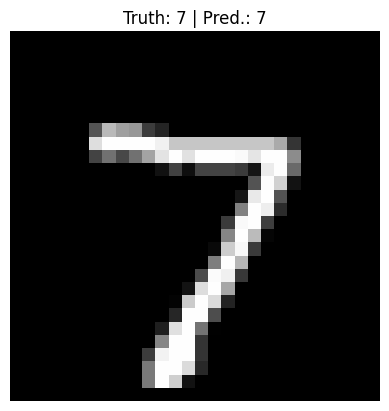

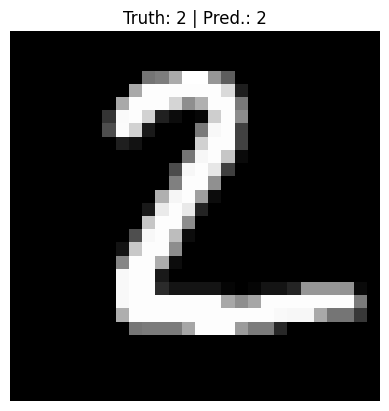

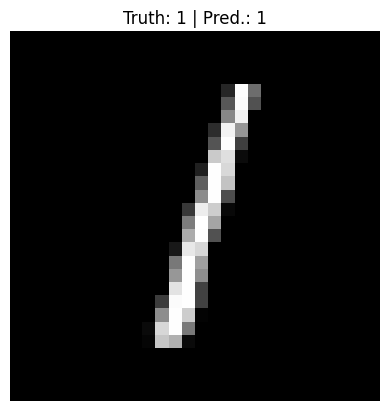

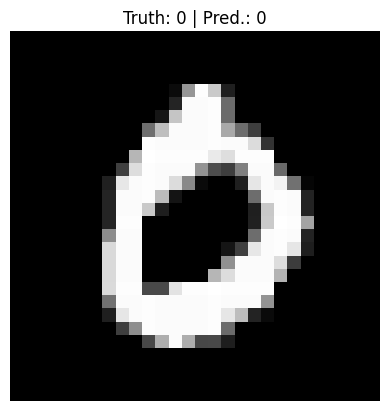

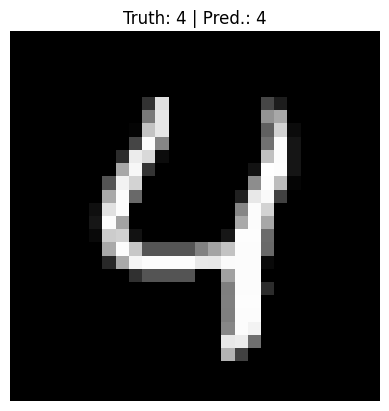

In [ ]:
num_to_plot = 5
for i in range(num_to_plot):
  img = test_data[i][0]
  label = test_data[i][1]

  # Logits -> Prediction probabilities -> Prediction labels
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plotting image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred.: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11 - Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be at least 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:00
mlxtend version: 0.23.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.0


In [ ]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [ ]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

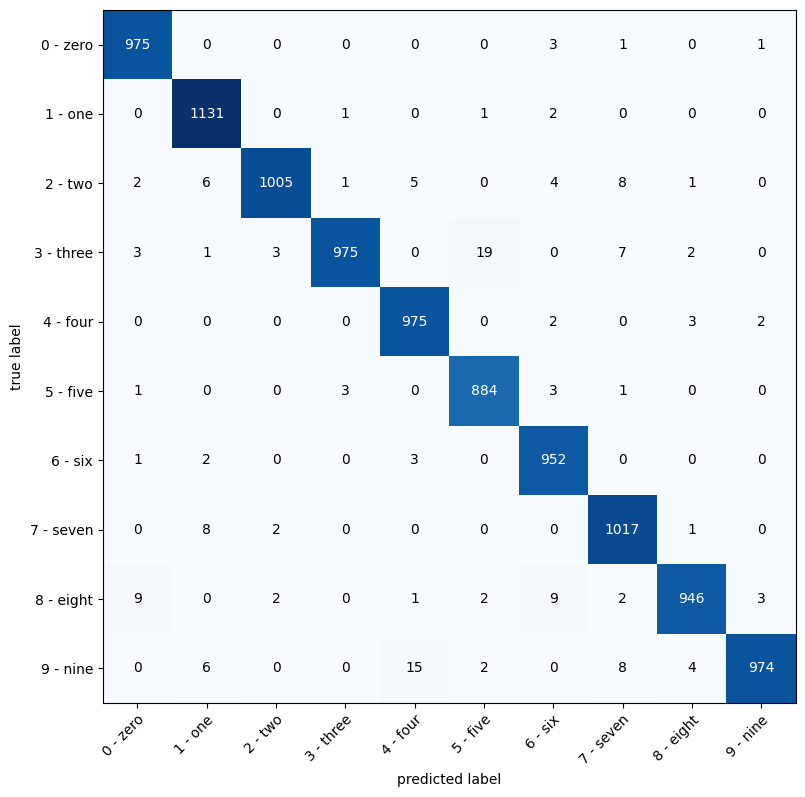

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(16,9)
)

## 12 - Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1,3,64,64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 64,
                       kernel_size = 3,
                       stride=2,
                       padding=1)
print(f"Random tensor original shape: \n{random_tensor.shape}")
rand_tensor_after_conv = conv_layer(random_tensor)
print(f"\n\nRandom tensor shape after pass through conv_layer: \n{rand_tensor_after_conv.shape}")
# If kernel_size goes up, the height and width goes down

Random tensor original shape: 
torch.Size([1, 3, 64, 64])


Random tensor shape after pass through conv_layer: 
torch.Size([1, 64, 32, 32])


## 13 - Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.

* Then plot some predictions where the model was wrong alongside what the label of the image should've been.

* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# FashionMNIST train and test database

from torchvision import datasets
from torchvision import transforms

fashion_train = datasets.FashionMNIST(root=".",
                                      download=True,
                                      train=True,
                                      transform=transforms.ToTensor())

fashion_test = datasets.FashionMNIST(root=".",
                                     download=True,
                                     train=False,
                                     transform=transforms.ToTensor())

len(fashion_train), len(fashion_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 13946698.03it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263252.78it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5001092.05it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19864100.27it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [ ]:
fashion_class = fashion_train.classes
fashion_class

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Turning Fashion data set in dataloader
from torch.utils.data import DataLoader
fashion_train_dataloader = DataLoader(fashion_train,
                                      batch_size=32,
                                      shuffle=True)
fashion_test_dataloader = DataLoader(fashion_test,
                                     batch_size=32,
                                     shuffle=False)

len(fashion_train_dataloader), len(fashion_test_dataloader)

(1875, 313)

In [ ]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)

model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Setup loss function and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task='multiclass',
                  num_classes=len(fashion_class)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backpropagation and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss and acc per epoch
  train_loss /= len(fashion_train_dataloader)
  train_acc /= len(fashion_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test =  model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss
      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_test_dataloader)
    test_acc /= len(fashion_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.628 | Train acc: 0.77 | Test loss: 0.001 | Test acc: 0.85
Epoch: 1 | Train loss: 0.351 | Train acc: 0.87 | Test loss: 0.001 | Test acc: 0.87
Epoch: 2 | Train loss: 0.317 | Train acc: 0.89 | Test loss: 0.000 | Test acc: 0.88
Epoch: 3 | Train loss: 0.298 | Train acc: 0.89 | Test loss: 0.000 | Test acc: 0.88
Epoch: 4 | Train loss: 0.284 | Train acc: 0.90 | Test loss: 0.001 | Test acc: 0.89


In [ ]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 6, 6, 5, 7]), 10000)

In [ ]:
# Getting wrong predictions
import numpy as np
wrong_pred = np.where(test_preds != fashion_test.targets)[0]
len(wrong_pred)

1096

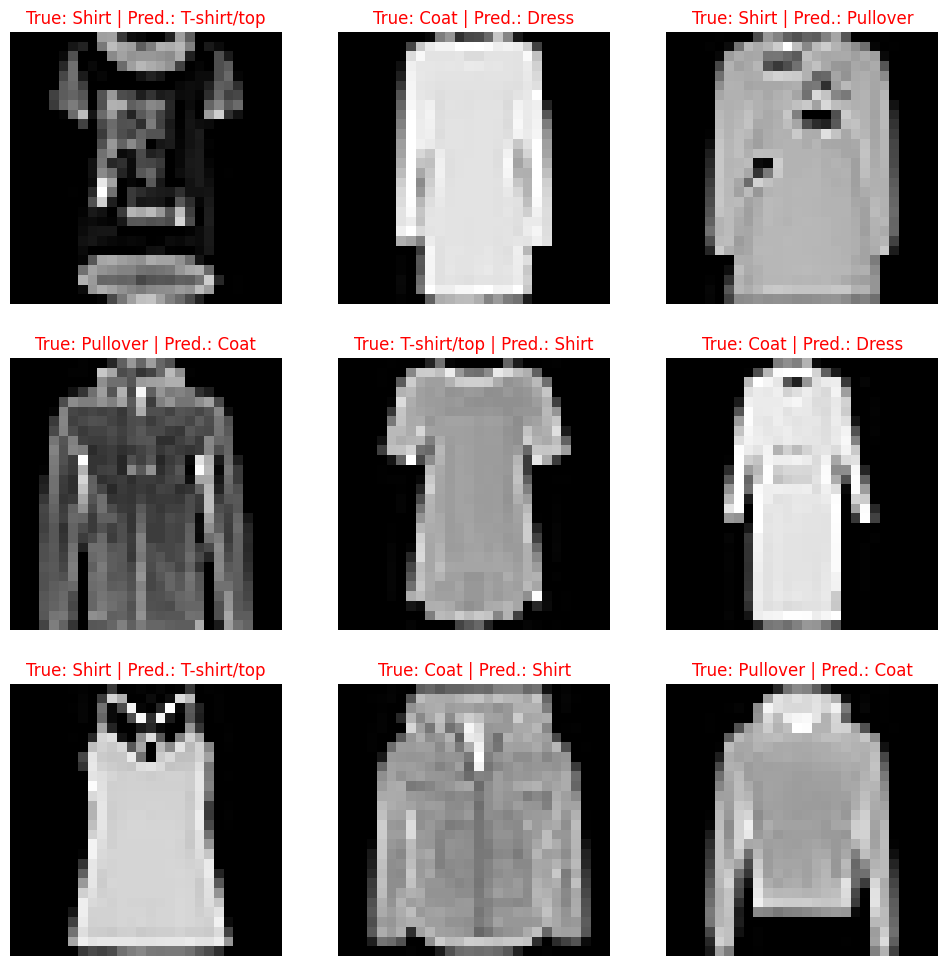

In [ ]:
# Select random 9 wrong predictions
import random
random_select = random.sample(list(wrong_pred), k=9)

plt.figure(figsize=(12,12))
for i, idx in enumerate(random_select):
  true_label = fashion_class[fashion_test[idx][1]]
  pred_label = fashion_class[test_preds[idx]]

  # plotting the wrong predictions
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred.: {pred_label}", c="r")
  plt.axis(False);

ANSWER: THe model could be better if the data wasn't so close, as can be seen in "True: Shirt | Pred.: Dress" and "True: T-shirt/top | Pred.: Dress".